## Wrangle the stock data

In [19]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
API_KEY = "KRN14ZLFIAEX3YGN"

In [2]:
#download the dataset
ts = TimeSeries(key=API_KEY, output_format='pandas')
#DJI = https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

#daily - get daily info up to 20a
allData, meta_data = ts.get_daily(symbol='DJI', outputsize='full')

In [3]:
# We can describe it
print(allData.describe())
print(meta_data)

            1. open       2. high        3. low      4. close     5. volume
count   4721.000000   4721.000000   4721.000000   4721.000000  4.721000e+03
mean   13247.195369  13324.324618  13167.535729  13249.884497  2.136582e+08
std     4305.270183   4308.232071   4302.902041   4306.440606  9.795457e+07
min     6547.009800   6709.609900   6469.950200   6547.049800  8.410000e+06
25%    10368.099600  10429.129900  10292.099600  10368.440400  1.386700e+08
50%    11568.469700  11638.280300  11501.769500  11572.200200  2.090700e+08
75%    16058.349600  16173.040000  15960.450200  16064.769500  2.668600e+08
max    26833.470700  26951.810500  26789.080100  26828.390600  8.239400e+08
{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'DJI', '3. Last Refreshed': '2018-10-05', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [4]:
#data = allData[:100] # first n rows
data = allData
print (data.describe())
print(data.index)

            1. open       2. high        3. low      4. close     5. volume
count   4721.000000   4721.000000   4721.000000   4721.000000  4.721000e+03
mean   13247.195369  13324.324618  13167.535729  13249.884497  2.136582e+08
std     4305.270183   4308.232071   4302.902041   4306.440606  9.795457e+07
min     6547.009800   6709.609900   6469.950200   6547.049800  8.410000e+06
25%    10368.099600  10429.129900  10292.099600  10368.440400  1.386700e+08
50%    11568.469700  11638.280300  11501.769500  11572.200200  2.090700e+08
75%    16058.349600  16173.040000  15960.450200  16064.769500  2.668600e+08
max    26833.470700  26951.810500  26789.080100  26828.390600  8.239400e+08
Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
       '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05

In [5]:
print(data.shape)

sample_size = data.shape[0]-1
endpoints = data[1:]
startpoints = data[:sample_size]

print (startpoints.index)
print (endpoints.index)

#save the startpoint index to be used as the date. This way yesterday's bin will hold value
#of change between yesterdays closing and todays closing, so yesterdays tweets get the value impact of today's
#stock market value development
indexes = startpoints.index

#let's reset the indexes
startpoints = startpoints.reset_index()
endpoints = endpoints.reset_index()
print (startpoints.index)
print (endpoints.index)


(4721, 5)
Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
       '2018-09-28', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04'],
      dtype='object', name='date', length=4720)
Index(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10',
       '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-18',
       ...
       '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
       '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05'],
      dtype='object', name='date', length=4720)
RangeIndex(start=0, stop=4720, step=1)
RangeIndex(start=0, stop=4720, step=1)


In [6]:
daily_change = endpoints["4. close"] - startpoints["4. close"]
daily_change.name = "daily change"

print(daily_change.describe())
print(daily_change.head())

count    4720.000000
mean        3.196937
std       132.380012
min     -1175.210900
25%       -57.872050
50%         6.050800
75%        69.010250
max       936.420000
Name: daily change, dtype: float64
0   -359.5801
1    124.7207
2    130.6094
3    269.2998
4     49.6406
Name: daily change, dtype: float64


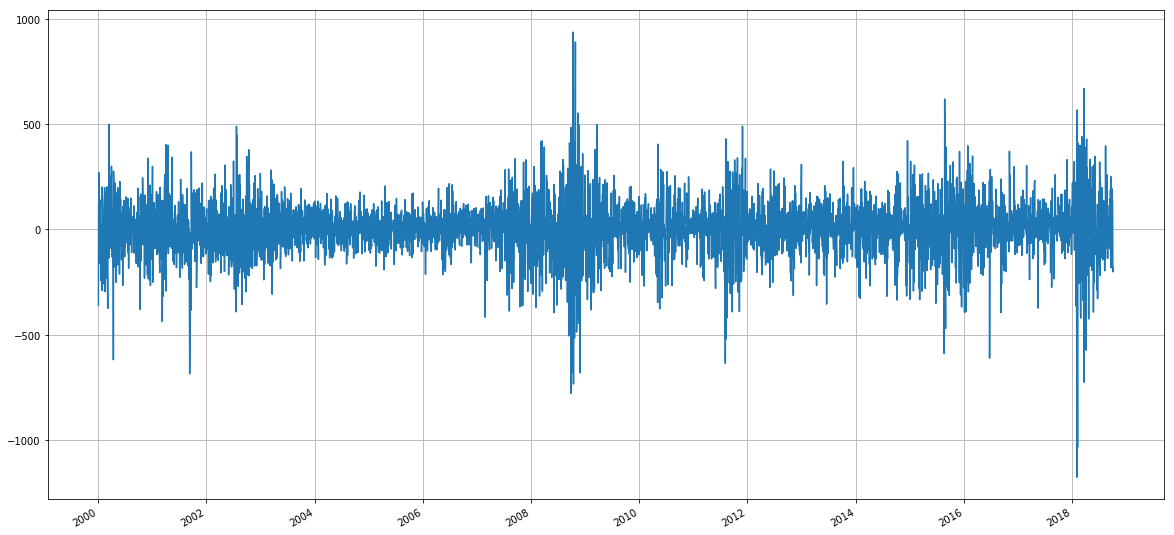

In [20]:
# change the dates in indexes to pandas Timestamps
indexes = pd.to_datetime(indexes)

#use the saved value for date-data
dates = indexes

fig, ax = plt.subplots()
ax.plot(dates, daily_change)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.grid()
plt.show()

In [8]:
#create the missing weekends
print("Before creating the missing days\n", dates[:10], "length ", len(dates))
imp_dates = pd.date_range(dates[0], dates[-1])
print("After creating the missing days\n", imp_dates[:10], "length ", len(imp_dates))

Before creating the missing days
 DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14'],
              dtype='datetime64[ns]', name='date', freq=None) length  4720
After creating the missing days
 DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
               '2000-01-11', '2000-01-12'],
              dtype='datetime64[ns]', freq='D') length  6850


In [9]:
#impute the missing data with zeros
df_all = pd.DataFrame(daily_change)
df_all.index = dates
df_all = df_all.reindex(imp_dates, fill_value=None)

print (df_all["daily change"][:10])

2000-01-03   -359.5801
2000-01-04    124.7207
2000-01-05    130.6094
2000-01-06    269.2998
2000-01-07     49.6406
2000-01-08         NaN
2000-01-09         NaN
2000-01-10    -61.1201
2000-01-11     40.0195
2000-01-12     31.3301
Freq: D, Name: daily change, dtype: float64


In [10]:
#impute with padding Friday values to the weekend days
df_all = df_all.fillna(method="pad")
print(df_all["daily change"][:10])

2000-01-03   -359.5801
2000-01-04    124.7207
2000-01-05    130.6094
2000-01-06    269.2998
2000-01-07     49.6406
2000-01-08     49.6406
2000-01-09     49.6406
2000-01-10    -61.1201
2000-01-11     40.0195
2000-01-12     31.3301
Freq: D, Name: daily change, dtype: float64


In [26]:
#write data as json
import json

print(df_all.describe())

folder = "../data/"
name = "DJI-20years-daily-change.json"
with open(folder + name, 'w') as file:
    file.write(df_all.to_json())

       daily change
count   6850.000000
mean       3.022527
std      135.644100
min    -1175.210900
25%      -55.750000
50%        5.330100
75%       69.165025
max      936.420000


In [27]:
#read data as json

name = "DJI-20years-daily-change.json"
with open(folder + name, "r") as file:
    read_frame = pd.read_json(file)
print(read_frame.describe())

       daily change
count   6850.000000
mean       3.022527
std      135.644100
min    -1175.210900
25%      -55.750000
50%        5.330100
75%       69.165025
max      936.420000


In [13]:
a = 365
x = len(df_all.index)

print("df_all:",df_all.describe())

dates_year = df_all.index[x-a:]
data_year = df_all["daily change"][x-a:]
print("data_year:",data_year.describe())
print("dates_year:",dates_year)


df_all:        daily change
count   6850.000000
mean       3.022527
std      135.644100
min    -1175.210900
25%      -55.750000
50%        5.330100
75%       69.165025
max      936.420000
data_year: count     365.000000
mean        8.127036
std       229.566140
min     -1175.210900
25%       -83.179700
50%        22.789100
75%       115.541100
max       669.400400
Name: daily change, dtype: float64
dates_year: DatetimeIndex(['2017-10-05', '2017-10-06', '2017-10-07', '2017-10-08',
               '2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12',
               '2017-10-13', '2017-10-14',
               ...
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02',
               '2018-10-03', '2018-10-04'],
              dtype='datetime64[ns]', length=365, freq='D')


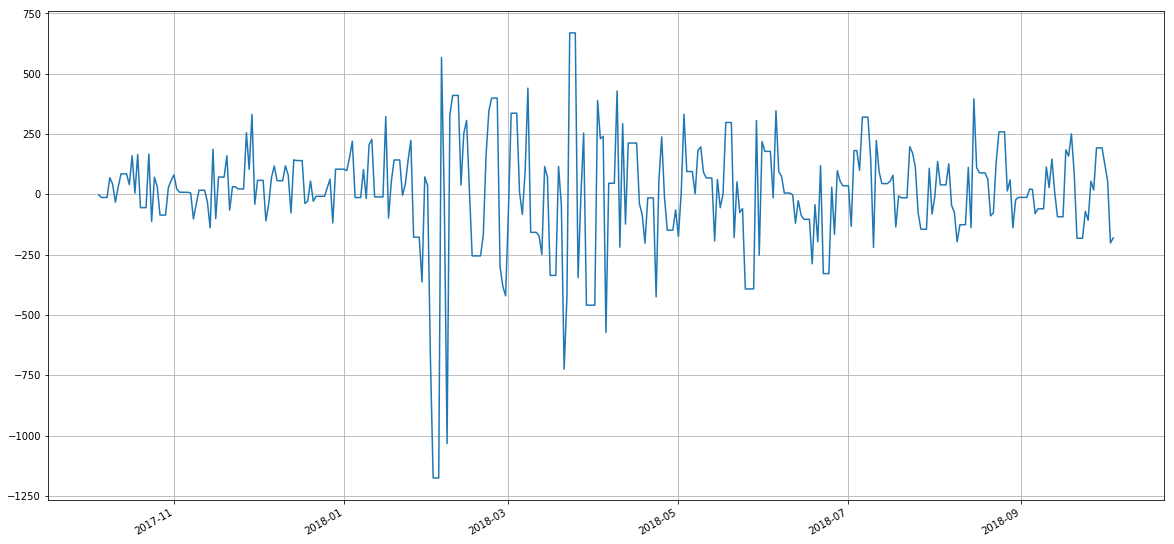

In [21]:
fig, ax = plt.subplots()
ax.plot(dates_year, data_year)

fig.autofmt_xdate()

plt.grid()
plt.show()

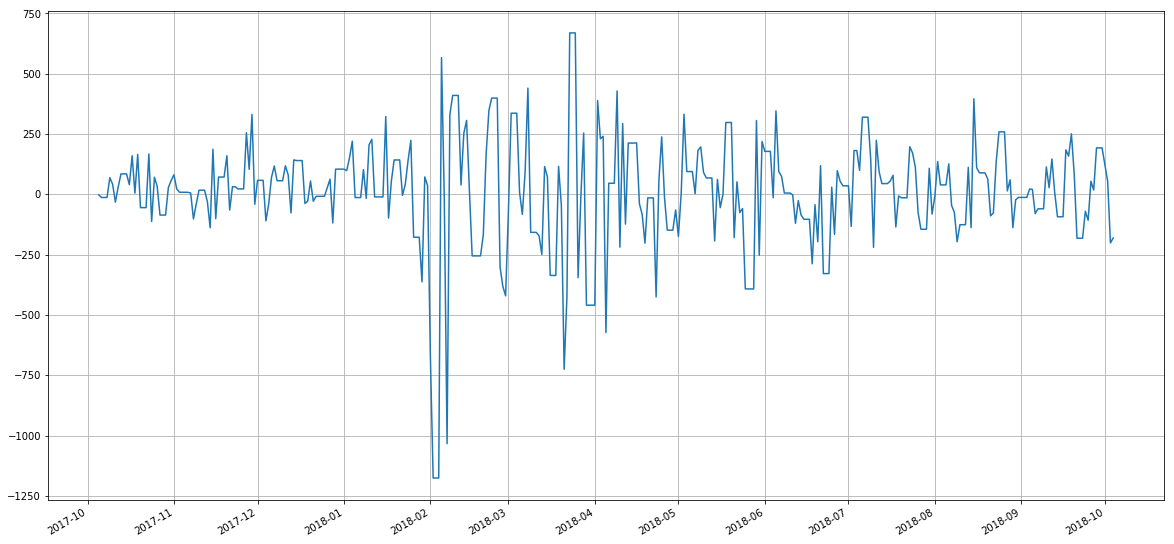

In [22]:
#example of using different locator
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dates_year, data_year)

#yearLoc = mdates.YearLocator()
#ax.xaxis.set_major_locator(yearLoc)
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

monthLoc = mdates.MonthLocator()
ax.xaxis.set_major_locator(monthLoc)
#ax.xaxis.set_minor_locator(monthLoc)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))

fig.autofmt_xdate()

plt.grid()
plt.show()

count     365.000000
mean        8.127036
std       229.566140
min     -1175.210900
25%       -83.179700
50%        22.789100
75%       115.541100
max       669.400400
Name: daily change, dtype: float64


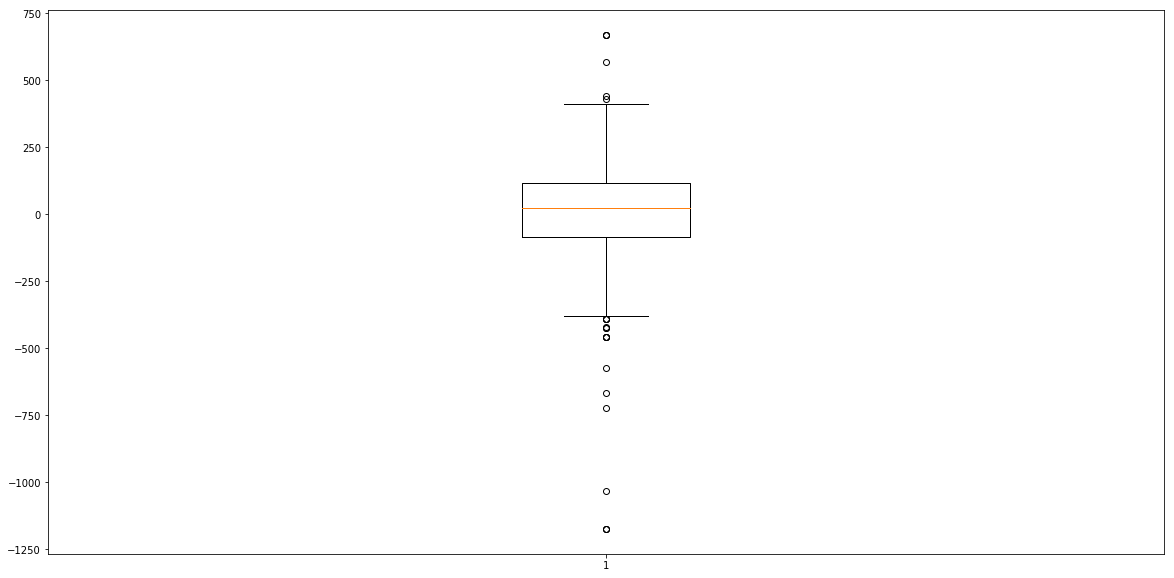

In [25]:
fig, ax = plt.subplots()
ax.boxplot(data_year)

print(data_year.describe())


In [28]:
#write the one year data to json file
df = pd.DataFrame(data_year)
df.index = dates_year
print(df.describe())

folder = "../data/"
latest_date = df.index[-1].strftime('%Y-%m-%d')
name = "DJI-last-year-stock-until-" + latest_date + ".json"

with open(folder + name, "w") as file:
    file.write(df.to_json())

       daily change
count    365.000000
mean       8.127036
std      229.566140
min    -1175.210900
25%      -83.179700
50%       22.789100
75%      115.541100
max      669.400400


In [30]:
#read one year data

import os

df = None
os.chdir("../data/")
for filename in os.listdir():
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            if "DJI-last-year-stock-until-" in file.name:
                df = pd.read_json(file)
                break
                
if df is None: print("file not found!")
else: print(df.describe())

       daily change
count    365.000000
mean       8.127036
std      229.566140
min    -1175.210900
25%      -83.179700
50%       22.789100
75%      115.541100
max      669.400400
